In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [38]:
df = pd.read_csv("my_dataframe.csv")

In [39]:
df.head(10)

,index,video_id,title,description,category_id,tags,duration,view_count,likes,comments,channel_title,thumbnail,Comments,date,time,likes_to_views_ratio,wiki_text,title_length,capital_percentage,has_question_mark
0,0,-gJ1a4qzO58,Adopted by the SMALLEST FAMILY in Minecraft! (...,Adopted by the SMALLEST FAMILY in Minecraft! (...,20,"['minecraft', 'yes smarty pie himlands', 'Adop...",1139,108078,3539,840,Paglaa Tech,{'url': 'https://i.ytimg.com/vi/-gJ1a4qzO58/de...,['Favrt COLOUR BTAO and SUBSCRIBE krke Heart l...,2023-03-10,09:32,0.032745,Action-adventure_game,8,37.78%,False
1,2,XbIegQ5v334,I started playing chess when I was three years...,Aswath S (2214) is one of the brightest upcomi...,17,"['chessbaseindia', 'interviews', 'chesstrainin...",208,2082,74,5,ChessBase India,{'url': 'https://i.ytimg.com/vi/XbIegQ5v334/de...,['Congratulations Aswath Varun.. Way to go bro...,2023-03-29,06:30,0.035543,Hobby,18,10.67%,False
2,5,bTo4s27L1Uw,#1 How @BBKiVines become 1 of India’s RICHEST ...,Booming digital stars book summary in Hindi \n...,27,"['seeken', 'zeeshan shaikh', 'booming digital ...",808,91801,5100,220,SeeKen,{'url': 'https://i.ytimg.com/vi/bTo4s27L1Uw/de...,"[""So nice explaining, can't express in words"",...",2023-03-26,05:16,0.055555,Society,13,26.15%,False
3,6,iEtjePI_sqc,Mere paas SABOOT nahi hai!,For any queries or feedback please mail us to ...,22,"['sambhavnaseth', 'ss vlogs', 'hindi vlogger',...",770,1059186,46367,1846,Sambhavna Seth Entertainment,{'url': 'https://i.ytimg.com/vi/iEtjePI_sqc/de...,['I recently delivered a baby boy. He is 10 da...,2023-03-04,07:45,0.043776,Lifestyle_(sociology),5,31.82%,False
4,8,gSYT7WSfekk,The BIRTH to DEATH of a Minecraft ELEPHANT! 😱 ...,The BIRTH to DEATH of a Minecraft ELEPHANT! 😱 ...,20,"['minecraft', 'yessmartypie himlands', 'The BI...",967,155964,6147,1163,Paglaa Tech,{'url': 'https://i.ytimg.com/vi/gSYT7WSfekk/de...,['Pet btao and Subscribe krke Heart lelo \r IN...,2023-03-12,07:50,0.039413,Action-adventure_game,10,47.73%,False
5,9,yXL-ZqGVzHo,TU HOTI TOH Part 2 ft. Raghvika Kohli & Tarun ...,Some journeys start but never end! This story ...,24,"['ncr days', 'love', 'love story', 'break up',...",1120,5661,248,17,Log Kya Kahenge,{'url': 'https://i.ytimg.com/vi/yXL-ZqGVzHo/de...,['Fabulous direction & acting️️️ Awesome origi...,2023-01-27,14:30,0.043809,Entertainment,15,29.82%,False
6,10,6-EMQ--PEso,বহুবিবাহ in Bangla Serial 😂| Amusing Rii,Follow me on-\nFacebook: https://m.facebook.co...,23,"['Amusing Rii', 'amusing rii new video', 'amus...",490,803063,32560,1488,Amusing Rii,{'url': 'https://i.ytimg.com/vi/6-EMQ--PEso/de...,['আপনাদের মতো ক্রিয়েটর থাকলে আশা করি বাংলা সির...,2023-01-27,15:03,0.040545,Entertainment,7,11.76%,False
7,11,fVToMH6onOs,5 LIFE Lessons Men Learn TOO LATE In Life (MUS...,Timestamps:\n00:00 - Robot Man And Future \n01...,27,"['masculine energy', 'how to be a high value m...",804,652716,33761,566,SeeKen,{'url': 'https://i.ytimg.com/vi/fVToMH6onOs/de...,['Mistakes-:1- good relationship is more impor...,2023-01-01,05:27,0.051724,Knowledge,17,35.62%,False
8,14,MdeZW2yuGzw,কেয়া মাসি With কচি মেসো 😛 | Keya Masi Roasted...,Follow me on-\nFacebook: https://m.facebook.co...,23,"['Amusing ri', 'amusing rii roast video', 'amu...",489,1097731,51146,2462,Amusing Rii,{'url': 'https://i.ytimg.com/vi/MdeZW2yuGzw/de...,['তোমার রোস্ট ছাড়া কেয়া মাসির রোস্ট অসম্পূর্...,2022-11-27,14:37,0.046592,Entertainment,13,12.5%,False
9,15,ku9HT426qt4,"My Last Reply😱-para_SAMSUNG,A3,A5,A6,A7,J2,J5,...",NaN,20,"['free fire', 'free fire max', 'shorts', 'vira...",59,225728,52648,1067,Prabhat Gamer,{'url': 'https://i.ytimg.com/vi/ku9HT426qt4/de...,"['', 'The peeli tatti was harmed in this video...",2023-03-20,14:30,0.233236,Action_game,3,30.59%,False


In [58]:
# Define a function to split the merged dataframe by channel
def split_by_channel(df, channel_names):
    channel_dfs = {}
    for channel_name in channel_names:
        channel_df = df[df["channel_title"] == channel_name]
        channel_dfs[channel_name] = channel_df
    return channel_dfs


channel_names = df["channel_title"].unique()
channel_dfs = split_by_channel(df, channel_names)

# Access a specific channel dataframe using its channel name as the key
channel_title = input("enter name: ")
channel_df = channel_dfs.get(channel_title, pd.DataFrame())

enter name: SeeKen


In [59]:
new_df = pd.DataFrame(channel_df.loc[:, ["video_id", "category_id", "view_count","date","time"]])

In [60]:
new_df.head()

,video_id,category_id,view_count,date,time
2,bTo4s27L1Uw,27,91801,2023-03-26,05:16
7,fVToMH6onOs,27,652716,2023-01-01,05:27
109,VEezDZjNn6I,27,246476,2023-01-15,05:39
122,8IyWZoM50PI,27,690064,2023-01-22,05:48
170,J4ZGLiVOlwg,27,664231,2023-02-26,05:46


In [61]:
# Assume the time column is in the format "HH:MM"
# First, extract the hour as a separate column
new_df["hour"] = new_df["time"].apply(lambda x: int(x.split(":")[0]))

# Define a function to categorize the hour into hourly buckets
def categorize_hour(hour):
    if hour == 0:
        return "00-01"
    elif hour == 23:
        return "23-00"
    else:
        return f"{hour:02d}-{hour+1:02d}"

# Apply the function to create a new column with the hourly bucket category
new_df["hour_category"] = new_df["hour"].apply(categorize_hour)


In [62]:
category_views_sum = new_df.groupby('hour_category')['view_count'].sum()
new_df['category_views_sum'] = new_df['hour_category'].map(category_views_sum)


In [63]:
new_df.head()

,video_id,category_id,view_count,date,time,hour,hour_category,category_views_sum
2,bTo4s27L1Uw,27,91801,2023-03-26,05:16,5,05-06,3085217
7,fVToMH6onOs,27,652716,2023-01-01,05:27,5,05-06,3085217
109,VEezDZjNn6I,27,246476,2023-01-15,05:39,5,05-06,3085217
122,8IyWZoM50PI,27,690064,2023-01-22,05:48,5,05-06,3085217
170,J4ZGLiVOlwg,27,664231,2023-02-26,05:46,5,05-06,3085217


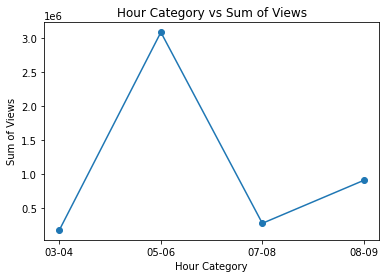

Hour category with highest sum of views: 05-06


In [66]:
import matplotlib.pyplot as plt

# Group the dataframe by hour category and calculate the sum of views for each category
grouped_df = new_df.groupby("hour_category")["view_count"].sum().reset_index()

# Plot a curve line graph of hour category vs sum of views
plt.plot(grouped_df["hour_category"], grouped_df["view_count"], marker="o")

plt.title("Hour Category vs Sum of Views")
plt.xlabel("Hour Category")
plt.ylabel("Sum of Views")
plt.show()

max_index = grouped_df["view_count"].idxmax()
max_hour_category = grouped_df.at[max_index, "hour_category"]
print("Hour category with highest sum of views:", max_hour_category)
